# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [10]:
# Your code here:

fifa["ValueNumeric"] = fifa.Value.str.extract('(\d+)').astype("int")
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,...,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,60
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,...,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,60
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,...,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,60
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,...,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,60


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [11]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

- Null hypothesis implies that the position and preferred foot have influence in the player's value
- Alternative hypothesis implies that the position and preferred foot do not have influence in the player's value
-----------------------------------------------------------------------------
- FROM the anova PR(>F) is P-value for significance of adding model terms

In [19]:
# Your code here:

ols_model = smf.ols("ValueNumeric ~ C(fifa['Position'])*C(fifa['Preferred Foot'])", data=fifa).fit()
sm.stats.anova_lm(ols_model, typ=2)

,sum_sq,df,F,PR(>F)
C(fifa['Position']),8.781574e+06,26.0,4.037146,2.070364e-11
C(fifa['Preferred Foot']),7.258024e+04,1.0,0.867549,3.516473e-01
C(fifa['Position']):C(fifa['Preferred Foot']),3.055200e+06,26.0,1.404564,8.274739e-02
Residual,1.513684e+09,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

We reject the Null Hypothesis due to the p-values being < 0.05

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [20]:
# Your code here:

ols_model = smf.ols("ValueNumeric ~ C(fifa['Nationality'])", data=fifa).fit()
sm.stats.anova_lm(ols_model, typ=2)

,sum_sq,df,F,PR(>F)
C(fifa['Nationality']),4.299134e+07,163.0,3.20523,1.747201e-38
Residual,1.484715e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

We reject the Null Hypothesis due to the p-values being < 0.05

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [25]:
# Your code here:
nulls = (fifa.isnull().sum()).sort_values(ascending=False)
fifa_v2 = fifa.dropna(axis=0)
fifa_v2.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

- The Null Hypothesis implies that the model fits better when it does not have independent variables.
- The Alternative Hypothesis implies that the model fits better when it has added independent variables.

In [42]:
# Your code here:
X = sm.add_constant(fifa_v2[['Stamina', 'SprintSpeed']])
Y = fifa_v2['ValueNumeric']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.498
Date:                Thu, 09 Jul 2020   Prob (F-statistic):             0.0111
Time:                        09:05:44   Log-Likelihood:            -1.2703e+05
No. Observations:               17918   AIC:                         2.541e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4959     10.394     26.987      0.000     260.123     300.869
Stamina        -0.5199      0.174     -2.992      0.003      -0.861      -0.179
SprintSpeed     0.3182      0.188      1.690      0.091      -0.051       0.687
==============================================================================
Omnibus:                     2099.331   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2256.726
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       2.412   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

- Prob (F-statistic) is the value for the p-value for the model. Since it's < 0.05 the Null Hypothesis is rejected.

- Moreover, the value of R^2 can only be between 0 and 1 with 1 indicating strong predictions and 0 indicating weak predictions. Since our value is **0.001** it means that our predictions are weak

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [47]:
# Your code here:
X = sm.add_constant(fifa_v2['Potential'])
Y = fifa_v2.ValueNumeric
model = sm.OLS(Y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1056.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):          3.17e-225
Time:                        09:16:26   Log-Likelihood:            -1.2652e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.531e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1063.4157     24.555     43.307      0.000    1015.285    1111.547
Potential    -11.1481      0.343    -32.503      0.000     -11.820     -10.476
==============================================================================
Omnibus:                     2017.022   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2746.365
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.779   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

- Prob (F-statistic) is the value for the p-value for the model. Since it's < 0.05 the Null Hypothesis is rejected.

- Moreover, the value of R^2 can only be between 0 and 1 with 1 indicating strong predictions and 0 indicating weak predictions. Since our value is **0.056** it means that our predictions are weak


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

Text(0, 0.5, 'Potential')

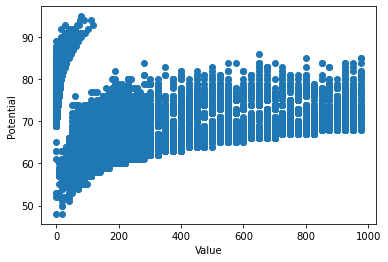

In [51]:
# Your code here:
plt.plot(fifa_v2.ValueNumeric, fifa_v2.Potential, 'o')
plt.xlabel("Value")
plt.ylabel("Potential")

- This is no linear relationship